**02452** *Machine Learning*, Technical University of Denmark

- This Jupyter notebook contains exercises where you fill in missing code related to the lecture topic. *First*, try solving each task yourself. *Then* use the provided solution (an HTML file you can open in any web browser) as inspiration if needed. If you get stuck, ask a TA for help.

- Some tasks may be difficult or time-consuming - using the solution file or TA support is expected and perfectly fine, as long as you stay active and reflect on the solution.

- You are not expected to finish everything during the session. Prepare by looking at the exercises *before* the class, consult the TAs *during* class, and complete the remaining parts *at home*.

---

# Week 2: Summary statistics, similarity, Nearest Neighbors and Decision Trees

**Content:**
- Part 1: Summary statistics and measures of similarity
- Part 2: Nearest neighbors method in Python
- Part 3: Decision trees in Python
- Part 4: Supervised learning on the Wine data

**Objectives:**
- Understand how to calculate summary statistics such as mean, variance, median, range, covariance and correlation.
- Understand the various measures of similarity such as Jaccard and Cosine similarity and apply similarity measures to query for similar observations.
- Become familiar with fitting decision trees and $k$-nearest neighbor models in Python.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

## Introduction

In this exercise, we start by taking a closer look on some of the building blocks of machine learning and statistical modeling, namely **summary statistics** and **similarity measures**. While summary statistics capture key properties of data and help us understand and compare datasets, similarity metrics such as cosine similarity and norm-based distances are essential for certain machine learning methods, e.g. **$k$-nearest neighbors (kNN)** and **decision trees (DCTs)**. In the final parts of the exercise, we will do **supervised learning** with kNNs and DCTs on two real datasets.

We first recap a few basic summary statistics and make sure you are comfortable computing these by hand and in Python. You may need to look up the definitions in the lecture notes.

**Task I.1:** Using pen and paper and a **basic** electronic calculator (e.g. on your computer), calculate the (empirical) mean, standard deviation (unbiased), median, and range of the following collection of numbers:
> $\mathbf{x}=[-0.68, -2.11,  2.39,  0.26,  1.46,  1.33,  1.03, -0.41, -0.33, 0.47]$

**Task I.2:** Verify your results by computing the same quantities with Python.
> *Hint:* Look at the help page of the functions `np.mean()`, `np.std()`, `np.median()`, `np.min()` and `np.max()`.

**Task 1.1 Answer**

empirical mean = 1/10 * (-0.68 + -2.11 + 2.39 + 0.26 + 1.46 + 1.33 + 1.03 - 0.41 - 0.33 + 0.47) = 0.341

standar deviation = 

meadian = 

In [13]:
import numpy as np
x = np.array([-0.68, -2.11, 2.39, 0.26, 1.46, 1.33, 1.03, -0.41, -0.33, 0.47])

mean_x = np.mean(x)
print(mean_x)
std_x = np.std(x)
print(std_x)
median_x = np.median(x)
print(median_x)
min_x = np.min(x)
max_x = np.max(x)
print(min_x)
print(max_x)

0.341
1.224364733239242
0.365
-2.11
2.39


**Task I.3:** Compute both the unbiased and biased estimate of the standard deviation using `np.std()`. Are the two estimates the same? What is the difference?
> *Hint:* Consider what the argument `ddof=1` means.

In [14]:

x_std_unbiased = np.std(x, ddof=1)
x_std_biased = np.std(x, ddof=0)
print(x_std_unbiased)
print(x_std_biased)

1.2905937479401572
1.224364733239242


<font color='orange'>
The two estimates are not the same. 

The difference is the denominator 1/n vs 1/n-1

np.std(x, ddof=1)

-> devides by n-1

-> Corrects the bias when estimating population variance from a sample.

</font>


---
## Part 1: Using similarity measures to retrieve information

We will take a closer look at **similarity measures** and how they form the basis of information retrieval systems. Specifically, we examine how to extract the most similar items from a **database** given a **query** - a central mechanism in **recommender systems** that is used in everything from movie suggestions on Netflix to improved response generation in large language models (LLMs) such as ChatGPT. 

Specifically, we have a dataset of $N=9298$ handwritten digits (USPS handwritten digits database), transformed to images of size $M=16\times 16 = 256$ pixels. We store the flattened images in a matrix as 
$$
    \boldsymbol{X} = \begin{bmatrix} \boldsymbol{x}_1 \\ \boldsymbol{x}_2 \\ \vdots \\ \boldsymbol{x}_N \end{bmatrix} = \underbrace{ \begin{bmatrix} x_{1,1} & x_{1,2} & \cdots & x_{1,256} \\ x_{2,1} & x_{2,2} & \cdots & x_{2,256} \\ \vdots & \vdots & \ddots & \vdots \\ x_{N,1} & x_{N,2} & \cdots & x_{N,256} \end{bmatrix}}_{M}
$$
Hence, each attribute corresponds to a particular pixel in the image where its value defines the grayscale intensity of the pixel. The goal is to match a **query image**, $\boldsymbol{q}$, to the images in the database $\boldsymbol{X}$, and extract the most similar one(s).

**Task 1.1:** Check the associated data folder. Load the `digits.npy` file and plot the first 5 samples in a subplot.

> *Hint:* You can load `.npy`-files using `np.load()`.

> *Hint:* Remember that you can use the `plt.subplots()` function for setting up the subplot structure. Use `plt.imshow(x, cmap='gray')` for visualizing a matrix `X` as a grayscale image.  

> *Hint:* Use `.reshape()` method for reshaping each array of pixel values into images of shape 16 x 16. 

**Task 1.2:** Extract the second image and define it as the query vector, i.e. $\boldsymbol{q} = \boldsymbol{x}_2$. Make sure that the data matrix $\boldsymbol{X}$ is updated accordingly.

> *Hint:* If in doubt, look up "NumPy Array Indexing" and remember that you can stack arrays with `np.vstack()`.

> *Hint:* Make sure the query vector is of shape `(1, 256)`. For help, see `.reshape()` method.

[[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -0.671 -0.828 -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]]


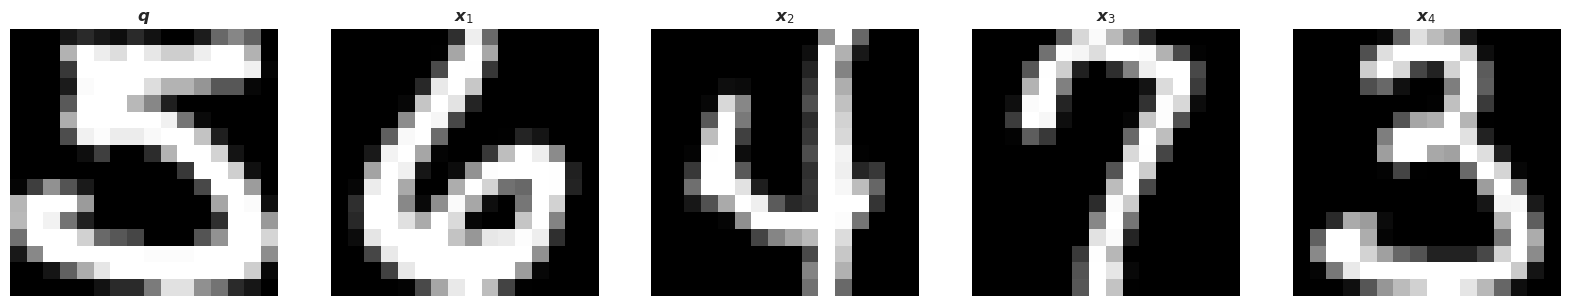

In [15]:
digits = np.load('data/digits.npy')
print(digits)

# Extract and remove the second digit to define the query
X = np.vstack([digits[0, :], digits[2:, :]])
q = digits[1, :].reshape(1, -1)
# change q to x_13
# X = np.vstack([digits[:12, :], digits[13:, :]])
# q = digits[12, :].reshape(1, -1)

# Number of images to plot
plot_n_images = 5

# Setup figure
fig, axs = plt.subplots(1, plot_n_images, figsize=(4*plot_n_images,4))

# Plot the query image
axs[0].imshow(q.reshape(16, 16), cmap='gray')
axs[0].set_title(r'$\boldsymbol{q}$')
axs[0].axis('off')

for i in range(1,5):
    # Extract image number i-1 (since we removed the query from X)
    digit = X[i-1].reshape(16, 16)  # Reshape to 16x16
    # Show image of digit
    axs[i].imshow(digit, cmap='gray')
    # Set title
    axs[i].set_title(r'$\boldsymbol{q}$' if i == 0 else rf"$\boldsymbol{{x}}_{{{i}}}$")
    # Remove axes
    axs[i].axis('off')
plt.show()
# Check the shape of the digits dataset
assert X.shape == (9297, 16*16), "There should be 9298 samples and 16x16 = 256 features"
assert q.shape == (1, 16*16), "There should be 1 sample and 16x16 = 256 features"

To measure similarity between $\boldsymbol{q}$ and the elements in $\boldsymbol{X}$, we will consider the measures SMC, Jaccard, Cosine, ExtendedJaccard, and Correlation, given by:
$$
\begin{align*}
  \mathrm{SMC}(\boldsymbol{q},\boldsymbol{x}_i)&=\frac{\text{Number of matching attribute values}}{\text{Number of attributes}} = \frac{\sum_{j=1}^M \mathbf{1}\left[x_{i,j} = q_j\right]}{M}\\ \\
  \mathrm{Jaccard}(\boldsymbol{q},\boldsymbol{x}_i)&=\frac{\text{Number of 11 matching attributes}}{\text{Number of attributes not involved in 00 matches}} = \frac{\sum_{j=1}^M \mathbf{1}\left[x_{i,j} = 1, q_{j} = 1\right]}{M - \sum_{j=1}^M  \mathbf{1}\left[x_{i,j} = 0, q_{j} = 0\right]  } 
\end{align*}
$$
$$
  \mathrm{Cosine}(\boldsymbol{q},\boldsymbol{x}_i) = \frac{\boldsymbol{q}^\top \boldsymbol{x}_i}{\|\boldsymbol{q}\|\|\boldsymbol{x}_i\|}, \quad \qquad
  \mathrm{ExtendedJaccard}(\boldsymbol{q},\boldsymbol{x}_i) = \frac{\boldsymbol{q}^\top \boldsymbol{x}_i}{\|\boldsymbol{q}\|^2+\|\boldsymbol{x}_i\|^2-\boldsymbol{q}^\top \boldsymbol{x}_i}, \qquad \quad
  \mathrm{Correlation}(\boldsymbol{q},\boldsymbol{x}_i) = \frac{\text{cov}(\boldsymbol{q},\boldsymbol{x}_i)}{\text{std}(\boldsymbol{q})\text{std}(\boldsymbol{x}_i)}
$$
where $\mathbf{1}\left[x_{i,j} = q_j\right]$ denotes the indicator function, $\displaystyle\mathrm{cov}(\boldsymbol{x},\boldsymbol{y})$ denotes the covariance between $\boldsymbol{x}$ and $\boldsymbol{y}$ and $\text{std}(\boldsymbol{x})$ denotes the standard deviation of $\boldsymbol{x}$.

The SMC and Jaccard similarity measures are only defined for binary data, i.e., data that takes values of $\{0,1\}$. As the
data we analyze is non-binary, we will transform the data to be binary when calculating these two measures of similarity by thresholding according to the median per-pixel intensity, i.e. setting
$$
  x_{i,j}=\left\{\begin{array}{ll} 0 & \mathrm{if}\ x_{i, j}<\mathrm{median}(\boldsymbol{X}_{:, j}) \\
    1 & \mathrm{otherwise}\end{array} \right.
$$
*Note that, depending on the situation, it can be incorrect to encode information in a single binary attribute - and this is true for binary attributes in general. If the meaning behind the value 0 is not specifically non-presence of an attribute, it can be erroneous. For instance, if male/female is encoded in one binary attribute (male: 0, female: 1), some measures will not model the information carried in being male, and a one-of-out-K encoding would be a proper representation.*

**Task 1.3:** Compute the median per-pixel intensity for the images in $\boldsymbol{X}$. Binarize the images as $\boldsymbol{X}_{\text{binarized}}$ and the query $\boldsymbol{q}_{\text{binarized}}$ using the above criteria. Plot the first 5 samples (when including the query).

> *Hint:* What should you set the `axis` argument to when using `np.median()`?

> *Hint:* You can construct a boolean version using `digits > your_code_here`. Then simply use `.astype(int)` to convert the boolean arrays to binary image arrays.

median_per_pixel [-1.    -1.    -1.    -1.    -1.    -1.    -0.719  0.055 -0.008 -0.581
 -0.998 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -0.429  0.394  0.859  0.825  0.402 -0.182 -0.963 -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -0.666  0.     0.188  0.558
  0.476 -0.065 -0.219 -0.62  -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.567 -0.316 -0.426 -0.317 -0.486 -0.608 -0.454 -0.545
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.682 -0.679
 -0.818 -0.928 -0.931 -0.781 -0.611 -0.549 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -0.809 -0.821 -0.876 -0.927 -0.915 -0.71
 -0.587 -0.747 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -0.906 -0.844 -0.81  -0.798 -0.686 -0.509 -0.573 -0.865 -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -0.997 -0.947 -0.799 -0.683
 -0.372 -0.336 -0.556 -0.893 -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -0.952 -0.802 -0.308 -0.28  -0.585 -0.906
 -1.    -1.

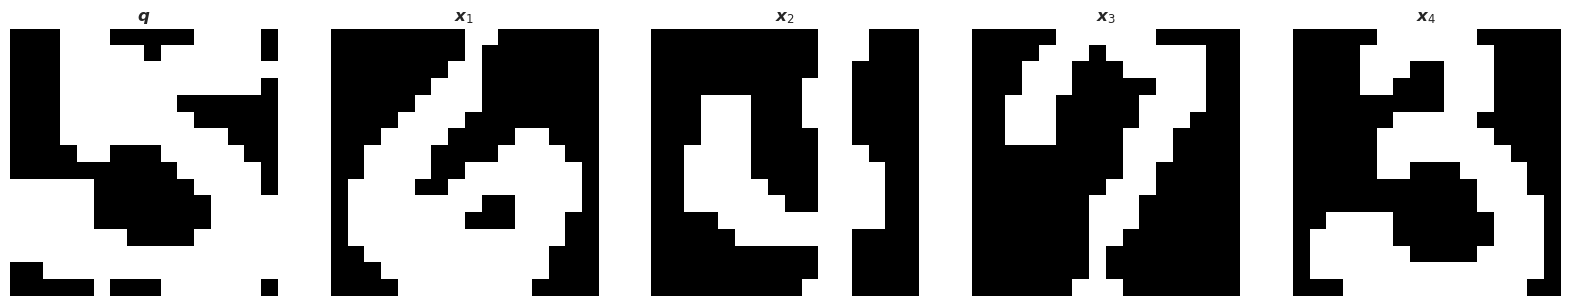

In [16]:
median_per_pixel = np.median(X, axis=0)
print('median_per_pixel',median_per_pixel)
print('X',X)


X_binarized = (X > median_per_pixel).astype(int)
q_binarized = (q > median_per_pixel).astype(int)
print(q_binarized)

print("Original matrix X:\n", X)
print("Transformed matrix x:\n", X_binarized)

print("Original matrix q:\n", q)
print("Transformed matrix q:\n", q_binarized)

assert all(np.unique(X_binarized) == [0, 1]), "X_binarized should be binary..."
assert all(np.unique(q_binarized) == [0, 1]), "q_binarized should be binary"

# Create figure
fig, axs = plt.subplots(1, 5, figsize=(20,4))

# Plot the query image
axs[0].imshow(q_binarized.reshape(16, 16), cmap='gray')
axs[0].set_title(r'$\boldsymbol{q}$')
axs[0].axis('off')

for i in range(1,5):
    # Extract image number i-1 (since we removed the query from X)
    digit = X_binarized[i-1].reshape(16, 16)  # Reshape to 16x16
    # Show image of digit
    axs[i].imshow(digit, cmap='gray')
    # Set title
    axs[i].set_title(rf"$\boldsymbol{{x}}_{i}$")
    # Remove axes
    axs[i].axis('off')
plt.show()


**Task 1.4:** Implement at least two of the similarity measures presented above as python functions. Use them to compute the similarity between $\boldsymbol{q}_{\text{binarized}}$ and each image in $\boldsymbol{X}_{\text{binarized}}$.

> *Hint:* The functions `np.sum()`, `np.dot()`, `np.linalg.norm()` and `np.power()` might be useful.

> *Hint:* Give it an honest try! But if it's really difficult, check out `sklearn.metrics.pairwise.cosine_similarity`, `sklearn.metrics.jaccard_score` or `scipy.stats.pearsonr`.


We provide code for visualizing the most similar images to the query, $\boldsymbol{q}$, that will run once you implement some of the similarity measures. 

**Task 1.5:** Read your way through the code for plotting the results. You have to write a line to get `most_similar_order` that should contain the indexes from $[1, 2, \dots N]$ sorted according to the similarity measure in descending order.

> *Hint:* Check out `np.argsort()` for getting the indices in sorted order. Is it sorted in ascending or descending order?

> *Hint:* You can reverse the elements of an array by using `x[::-1]`. Hence if `x = [1, 2, 3]`, then `x[::-1]` is `[3, 2, 1]`. 

[0.59765625 0.5        0.42578125 ... 0.43359375 0.59765625 0.39453125]
[0.45212766 0.30810811 0.20967742 ... 0.27860697 0.50952381 0.16216216]
[0.62916375 0.49211129 0.37590471 ... 0.44613371 0.67516285 0.31270365]
[0.45212766 0.30810811 0.20967742 ... 0.27860697 0.50952381 0.16216216]
[ 0.22024038  0.07787021 -0.05497775 ... -0.0908656   0.14734494
 -0.1131784 ]


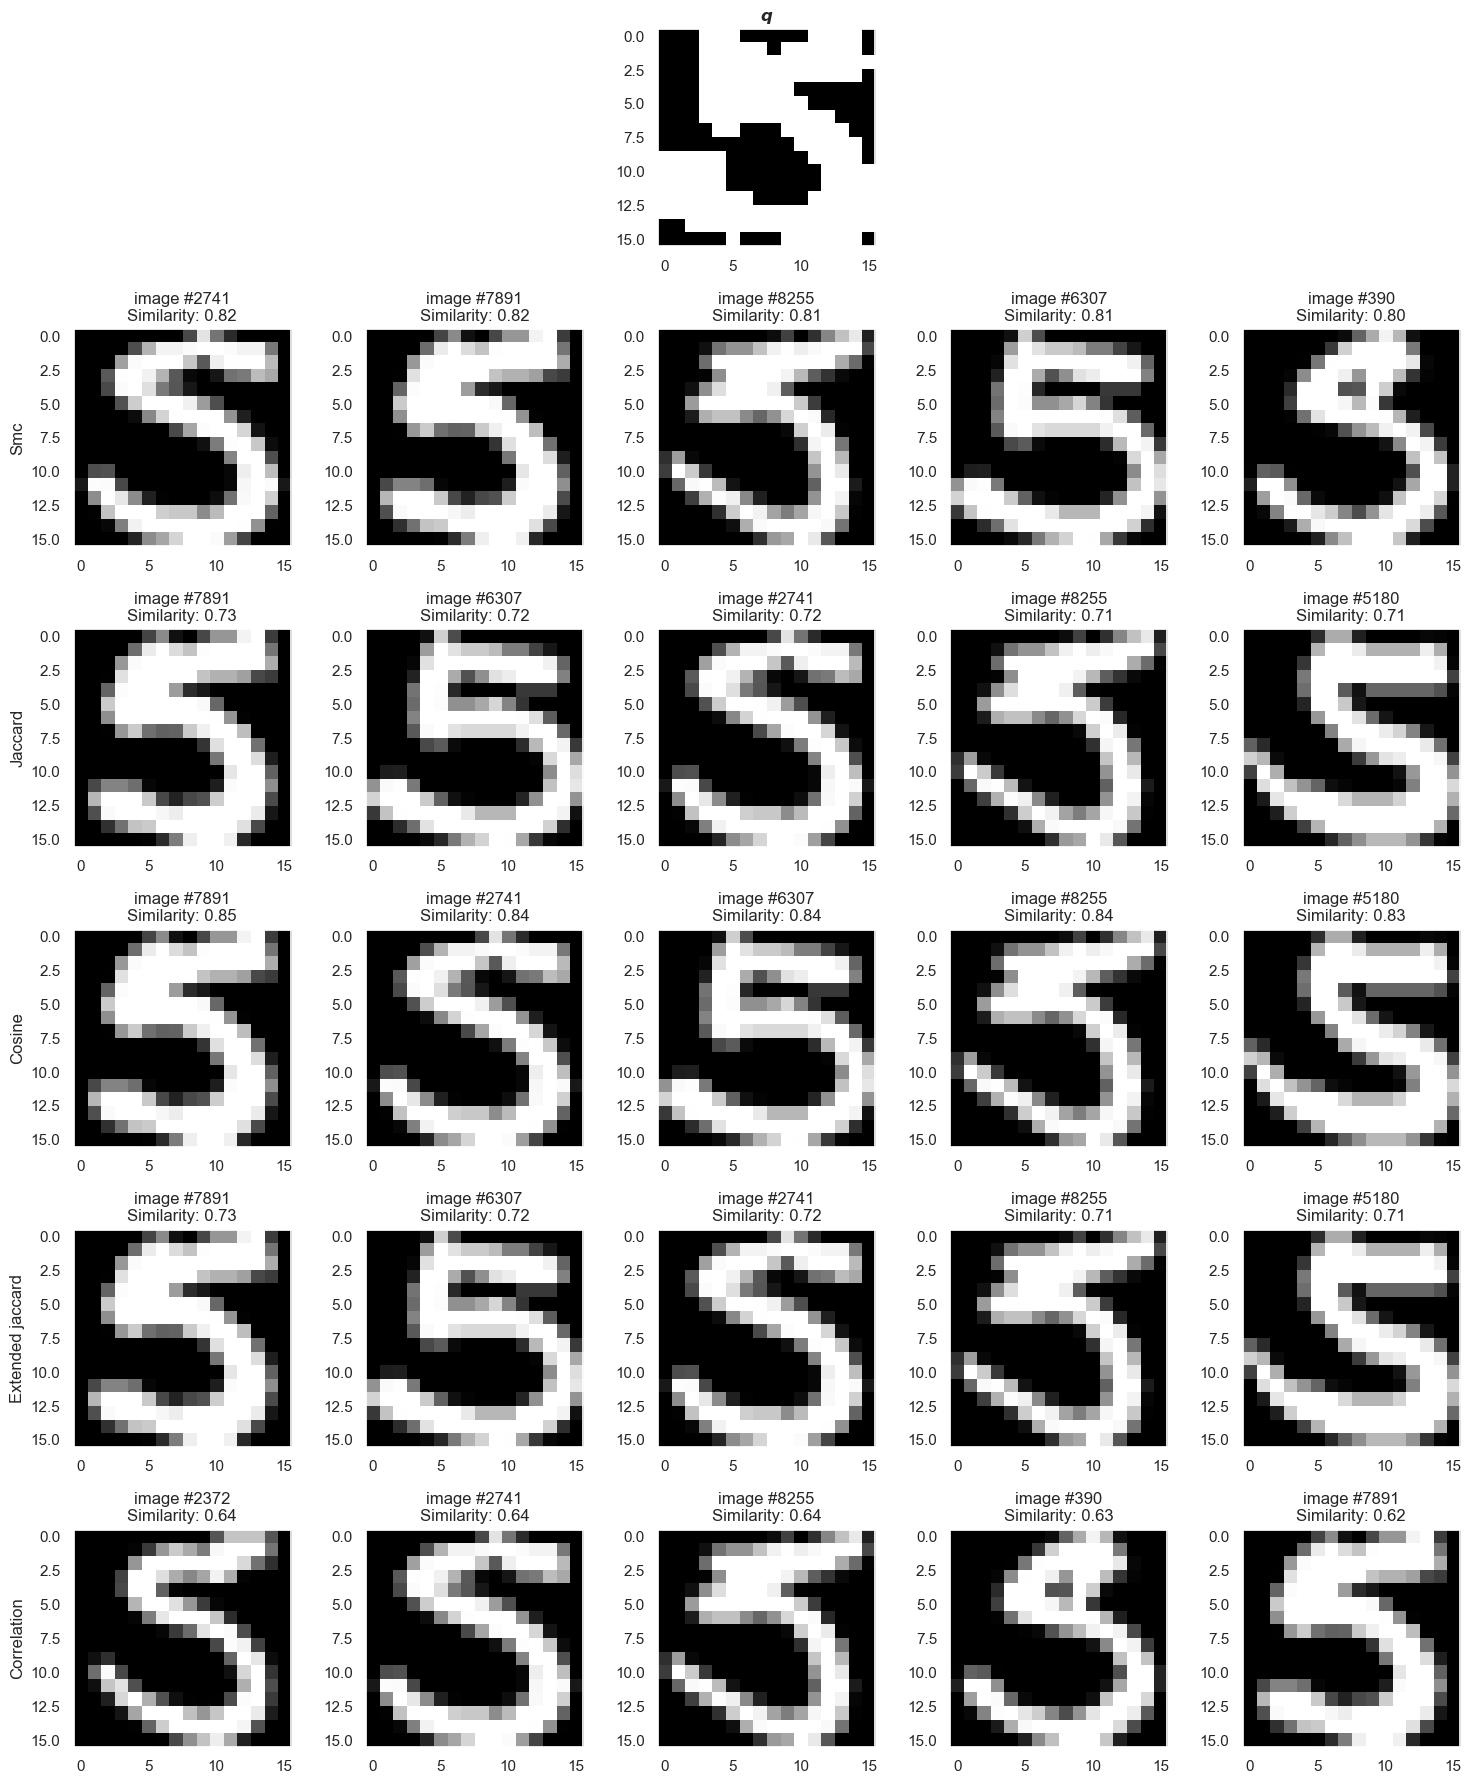

In [17]:
def smc(q, X):
    # q: the binarized query vector of shape (1 x M)
    # X: a set of binarized database vectors of shape (N x M)
    M = X.shape[1] #length of the first vector in X is the same as q

    return (q == X).sum(axis=1)/M


def jaccard(q, X): # or alternatively using sklearn.metrics.jaccard_score
    # q: the binarized query vector of shape (1 x M)
    # X: a set of binarized database vectors of shape (N x M)
    M = X.shape[1]

    return np.sum((q == 1) & (X == 1),axis=1)/(M-np.sum((q == 0) & (X == 0),axis=1))

def cosine(q, X):
    # q: the query vector of shape (1 x M)
    # X: a set of database vectors of shape (N x M)

    q_norm = np.linalg.norm(q)
    X_norm = np.linalg.norm(X, axis=1)
    dot_product = np.dot(q, X.T).flatten()
    return dot_product / (q_norm * X_norm) # why axis=1 ?

def extended_jaccard(q, X):
    # q: the query vector of shape (1 x M)
    # X: a set of database vectors of shape (N x M)
    dot_product = np.dot(q, X.T).flatten()

    return dot_product/(np.power(np.linalg.norm(X,axis=1),2) + np.power(np.linalg.norm(q),2) - dot_product)
    

def correlation(q, X):
    # q: the query vector of shape (1 x M)
    # X: a set of database vectors of shape (N x M)
    # Center the vectors
    q_centered = q - np.mean(q)
    X_centered = X - np.mean(X, axis=1, keepdims=True)
    # Compute covariance term
    covariance = np.dot(q_centered, X_centered.T).flatten()
    # Compute standard deviations
    std_q = np.linalg.norm(q_centered)
    std_X = np.linalg.norm(X_centered, axis=1)
    return covariance / (std_q * std_X)

    # why not this 
    return np.cov(X,q)/np.var(X)*np.var(q)


# Define the number of top results to retrieve
top_k = 5

# Define similarity functions to run in a list
similarity_functions = [smc, jaccard, cosine, extended_jaccard, correlation]

# Initialize figure
fig = plt.figure(figsize=(3*top_k, 3*(len(similarity_functions)+1)))
# Plot the query image
ax = fig.add_subplot(len(similarity_functions)+1, 1, 1)
ax.imshow(q_binarized.reshape(16, 16), cmap='gray')
ax.set_title(r'$\boldsymbol{q}$')
ax.grid(False)
plot_idx = top_k + 1 # update plot index

# Iterate over the similarity functions and compute similarities
for sim_func in similarity_functions:
    # Compute similarities using the binarized images and query
    similarities = sim_func(q_binarized, X_binarized)
    print(similarities)

    # Sort indices by similarity in descending order.
    # Make sure to construct it as the 1D array `most_similar_order`
    most_similar_order = np.argsort(similarities)[::-1]
    least_similar_order = np.argsort(similarities)

    # Sort the images in the database
    sorted_images = X[most_similar_order]
   
    # Plot the top-k most similar images under the corresponding similarity function
    for k in range(top_k):
        # Create subplot for each image
        ax = fig.add_subplot(len(similarity_functions)+1, top_k, plot_idx)
        # Plot the image
        ax.imshow(sorted_images[k].reshape(16, 16), cmap='gray')
        # Set a title
        ax.set_title(f'image #{most_similar_order[k]}\nSimilarity: {similarities[most_similar_order[k]]:.2f}')
        ax.grid(False)

        # Add y-label if it's the first image in the row
        if k == 0:
            ax.set_ylabel(f'{sim_func.__name__.capitalize().replace("_", " ")}')

        # Update plot index
        plot_idx += 1
         

fig.tight_layout()
plt.show()

Congratulations! If your implementation is correct, we should be able to retrieve somewhat reasonable images using either of the measures and we have the basis of a recommender system.

**Task 1.6:** Try to change the query image to e.g. $\boldsymbol{q}=\boldsymbol{x}_{13}$. Are the retrieved images still related to the query? Argue why / why not?

- *Answer:* When I change it to x_13 the query image is of the number 1. The retrived images are still related to the query

**Task 1.7:** How does the *least* similar images look? And what happens if you use $\boldsymbol{X}$ and $\boldsymbol{q}$ instead of $\boldsymbol{X}_{\text{binarized}}$ and $\boldsymbol{q}_{\text{binarized}}$ when computing the similarities? 

- *Answer:* 
- the least similar images are of 0 mostly, some of 7 and some of 6.
- When q = 5 and I don't use the binarized X and q and I print out the most_similar_images I get some incorrect images, so when q is 5 I get a 6 and 0.
- When q = 5 and I don't use te binarized X and q and I print the least_similar_images I get a lot of 4. 


We will now investigate how scaling and translation impact the following three similarity measures: Cosine, ExtendedJaccard, and Correlation. 

**Task 1.8:** Let $\alpha$ and $\beta$ be two constants. Determine which of the following statements are correct (you may need to use pen and paper). You can verify your statements with a coding example.

$$
\begin{align*}
  \mathrm{Cosine}(\boldsymbol{x},\boldsymbol{y})&=\mathrm{Cosine}(\alpha\boldsymbol{x},\boldsymbol{y}) \\
  \mathrm{ExtendedJaccard}(\boldsymbol{x},\boldsymbol{y})&=\mathrm{ExtendedJaccard}(\alpha\boldsymbol{x},\boldsymbol{y}) \\
  \mathrm{Correlation}(\boldsymbol{x},\boldsymbol{y})&=\mathrm{Correlation}(\alpha\boldsymbol{x},\boldsymbol{y}) \\
  \mathrm{Cosine}(\boldsymbol{x},\boldsymbol{y})&=\mathrm{Cosine}(\beta+\boldsymbol{x},\boldsymbol{y}) \\
  \mathrm{ExtendedJaccard}(\boldsymbol{x},\boldsymbol{y})&=\mathrm{ExtendedJaccard}(\beta+\boldsymbol{x},\boldsymbol{y}) \\
  \mathrm{Correlation}(\boldsymbol{x},\boldsymbol{y})&=\mathrm{Correlation}(\beta+\boldsymbol{x},\boldsymbol{y}) \\
\end{align*}
$$

> *Hint:* Even though a similarity measure is theoretically invariant e.g. to scaling, it might not be exactly invariant numerically.

**Task 1.9:** Discuss the pratical implications of similarity measures that are translation and/or scaling invariant. You can base the discusison on the image digits dataset but think also of non-image example (e.g. retrieving documents based on the bag-of-words representation from last weeks exercise).

In [18]:
np.random.seed(42)

# Generate two data objects with M random attributes
M = 5
x = np.random.rand(1, M)
y = np.random.rand(1, M)

# Two constants
a = 1.5
b = 1.5

# Check the statements by computing LHS and RHS of the statements
print(f"Cosine scaling:{(cosine(x,y) - cosine(a*x,y)).item():.4f}") # TRUE
print(f"Extended Jaccard scaling:{(extended_jaccard(x,y) - extended_jaccard(a*x,y)).item():.4f}") # FALSE
print(f"Correlation scaling:{(correlation(x,y) - correlation(a*x,y)).item():.4f}") # TRUE
print(f"Cosine scaling:{(cosine(x,y) - cosine(b+x,y)).item():.4f}") # FALSE
print(f"Extended Jaccard scaling:{(extended_jaccard(x,y) - extended_jaccard(b+x,y)).item():.4f}") # FALSE
print(f"Correlation scaling:{(correlation(x,y) - correlation(b+x,y)).item():.4f}") # TRUE



Cosine scaling:-0.0000
Extended Jaccard scaling:0.0787
Correlation scaling:-0.0000
Cosine scaling:-0.1270
Extended Jaccard scaling:0.2509
Correlation scaling:0.0000



---
## Part 2: Nearest neighbors method in Python

In this exercise we will use the $k$-nearest neighbors (KNN) method for classification. First, we will explore how $k$-nearest neighbors work for 4 different synthetic datasets and how the choice of distance/dissimilarity measure used matters, depending on the dataset. We will consider *training* our $k$-nearest neighbors on a *training set* split of the dataset and later evaluate the learned model on a *test set* split of the dataset where we already splitted the datasets for you.

**Task 2.1:** Examine the associated datafolder and load the `synth1_train.csv` and `synth1_test.csv` files using Pandas. From the splitted dataset, construct $\left(\boldsymbol{X}_{\text{train}}, \boldsymbol{y}_{\text{train}}\right)$ and $\left(\boldsymbol{X}_{\text{test}},\boldsymbol{y}_{\text{test}}\right)$.

> *Hint:* If you forgot how to load `.csv`-files, check last weeks exercise.

In [19]:
import pandas as pd
dataset_name = 'synth1'

# Load the dataset splits and construct the datamatrices X_train, X_test and target vectors y_train, y_test


# Load data from csv 
df_train = pd.read_csv(r'data/synth/synth1_train.csv')
df_test = pd.read_csv(r'data/synth/synth1_test.csv')

X_train = df_train.iloc[:, :2]
y_train = df_train.iloc[:, 2]

X_test = df_test.iloc[:, :2]
y_test = df_test.iloc[:, 2]

# Check that the input shapes are correct
assert X_train.shape[1] == 2, f"Expected 2 features, but got {X_train.shape[1]}"
assert X_test.shape[1] == 2, f"Expected 2 features, but got {X_test.shape[1]}"

Since the data is 2-dimensional, we can examine it closer by making a scatter plot of the points. We make a scatter plot of the points from the training data by directly leveraging Pandas' plotting tools and color the points based on their labels.

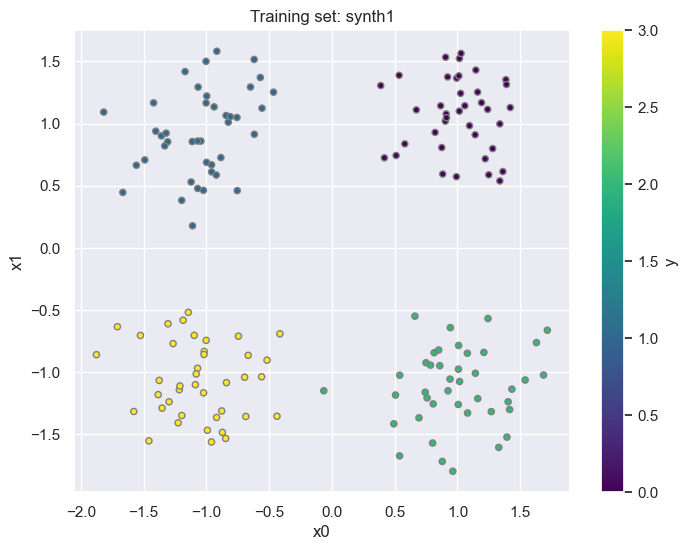

In [20]:
# Visualize the training data, colored by the target variable
df_train.plot(kind='scatter', x='x0', y='x1', c='y', cmap='viridis', title=f'Training set: {dataset_name}', figsize=(8, 6), edgecolor='gray')
plt.show()

For creating a classification model using $k$-nearest neighbors we need to define what it means to be a close neighbors - or in other words, **how we define similarity between points**. More specifically, we need to choose:
- the number of neighbors, $k$
- a distance measure, $d(\boldsymbol{x}_i, \boldsymbol{x}_j)$

We remark that distance measures are inversely related to similarity measures by definition. As an example, we can convert cosine similarity to a distance measure by $1 - \mathrm{Cosine}(\boldsymbol{x}_i, \boldsymbol{x}_j)$ since the maximum cosine similarity is 1.

If we want to classify some new observation, $\boldsymbol{x}^\ast$, using $k$-nearest neighbors, we then have to:
1) compute the distance from $\boldsymbol{x}^\ast$ to all points, $\boldsymbol{x}_i$, from the training data, i.e. $d(\boldsymbol{x}^\ast, \boldsymbol{x}_i)$ where $\boldsymbol{x}_i$ is the $i$'th row in $\boldsymbol{X}_{\text{train}}$.
2) find the $k$ nearest data points in $\boldsymbol{X}_{\text{train}}$ and get their labels.
3) classify $\boldsymbol{x}^\ast$ according to the majority label of the $k$ nearest neighbors.

As you have seen in the lecture, a common distance measure is the **general Minkowski distance** also known as the **$p$-norm**:
$$
    d_p\left(\boldsymbol{x}^\ast, \boldsymbol{x}\right) = \left( \sum_{j=1}^M \lvert x^\ast_j - x_{j}\rvert^p\right)^{\frac{1}{p}}
$$
which reduces to the cityblock (or Manhattan) distance for $p=1$ and the Euclidean distances for $p=2$:
$$
\begin{align*}
    \text{Cityblock}: \ d_1\left(\boldsymbol{x}^\ast, \boldsymbol{x}\right) = \sum_{j=1}^M \lvert x^\ast_j - x_{j}\rvert \qquad \qquad
    \text{Euclidean}: \ d_2\left(\boldsymbol{x}^\ast, \boldsymbol{x}\right) = \sqrt{\sum_{j=1}^M \lvert x^\ast_j - x_{j}\rvert^2}
\end{align*}
$$

**Task 2.2:** Consider the new observation $\boldsymbol{x}^\ast = [1, -1]^\top$. Use `KNeighborsClassifier` from `sklearn` to classify the point using the Euclidean distance measure and $k=5$.

> *Hint:* Checkout the documentation for `sklearn.neighbors.KNeighborsClassifier` to find out how to "train" and predict with it.

**Task 2.3:** Plot the new observation as a red dot as well as the $k$ closest neighbors as black crosses on top of the training data figure. Verify from the predicted label and visualization that your implementation is correct.

> *Hint:* You can find the closest neighbors using the `.kneighbors()` method of the `KNeighborsClassifier` object.

> *Hint:* Set `marker='x'` or `marker='o'` in `plt.scatter()` for getting crosses and dots, respectively.

Predicted label: [2.]
Indices of nearest neighbors: [[ 85 104 118  97  98]]
Distances: [[0.02651723 0.07569669 0.0804173  0.14294109 0.15043285]]


/Users/kristinbodvarsdottir/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/kristinbodvarsdottir/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


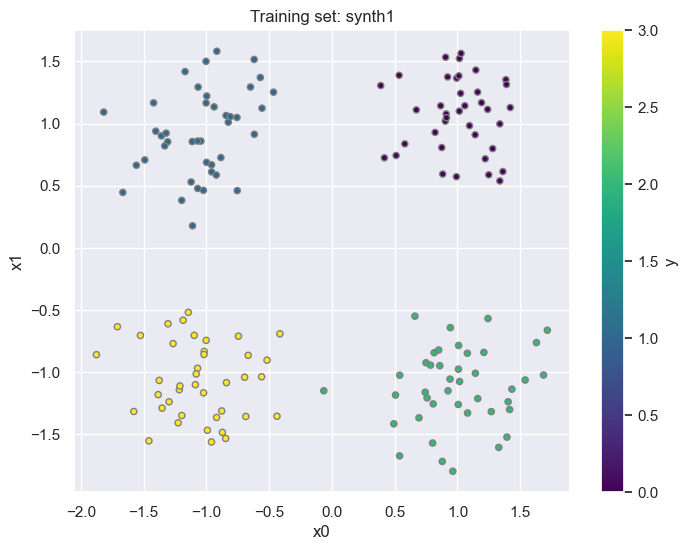

In [21]:
k = 5
x_new = np.array([[1, -1]])

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


pred_label = knn.predict(x_new)
print("Predicted label:", pred_label)


distances, indices = knn.kneighbors(x_new)
print("Indices of nearest neighbors:", indices)
print("Distances:", distances)
# Visualize the training data, colored by the target variable
df_train.plot(kind='scatter', x='x0', y='x1', c='y', cmap='viridis', title=f'Training set: {dataset_name}', figsize=(8, 6), edgecolor='gray')

# Plot the new point and its closest neighbors
# X_new.plot()
plt.show()

We are interested in determining how well this classification method works. To do so, we use it to classify the test dataset $\boldsymbol{X}_{\text{test}}$ and compare the predictions with the true test labels $\boldsymbol{y}_{\text{test}}$.

**Task 2.4:** Compute the predicted labels for all data points in $\boldsymbol{X}_{\text{test}}$ and compute the accuracy and error rate. Generate the confusion matrix and plot it. How well does the model perform? Does it perform specifically better/worse on some classes than others?

> *Hint:* To generate a confusion matrix, you can use the function `confusion_matrix()` function from the `sklearn.metrics` module. Use `plt.imshow()` for plotting the matrix or `sns.heatmap()`.

In [ ]:
y_pred = knn.predict(X_test)


NameError: name 'model' is not defined

In addition to this, we might be able to say something qualitatively about the model's performance by visualizing the **decision boundary** - that is how the 2D input space is separeted by the $k$-nearest neighbors model.

**Task 2.5:** Visualize the decision boundary by predicting the label for every input point $\boldsymbol{x}^\ast$ in a fine grid over the input space. Plot the training and test data on top.

> *Hint:* The first lines of code generates a fine grid of points in the input space and stacks them into the data matrix format of shape $N \times M$.

> *Hint:* Apply your $k$-nearest neighbors model to every point on the grid and store the labels. Then reshape the predicted labels into shape `resolution` $\times$ `resolution` and plot the decision boundary using `plt.imshow()`. 

In [ ]:
# Define resolution of the grid, i.e. how many points per axis
resolution = 500
# Construct the grid
min_x0, max_x0 = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
min_x1, max_x1 = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
X_pred = np.meshgrid(
    np.linspace(min_x0, max_x0, resolution),
    np.linspace(min_x1, max_x1, resolution)
)
# Stack the grid points into the format of X, i.e. shape N x M
X_pred = np.stack([X_pred[0].ravel(), X_pred[1].ravel()]).T

# YOUR CODE HERE
raise NotImplementedError()

InvalidIndexError: (slice(None, None, None), 0)

**Task 2.6:** Go back and experiment with the distance measure and number of neighbors and run the experiment for the other synthetic datasets too. As distance measures, consider cityblock, Euclidean and cosine as discussed in Part 1 (specifically useful for the `synth2` dataset). Which distance measures worked best for the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give an example of when it would be good to use a large/small number of neighbors? Consider e.g. when clusters are well separated versus when they are overlapping.

> *Hint:* For `synth3` you might find the Mahalanobis distance useful. Use `model = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': np.cov(X_train, rowvar=False)})` for doing so. You can find further details on this distance metric [on this link](https://en.wikipedia.org/wiki/Mahalanobis_distance).

- *Answer:* 

### Regression with $k$-nearest neighbors

In the previous example we used $k$-nearest neighbors for solving a classification problem, but the method can just as well be used for modeling a regression task. We follow a similar algorithmic approach as before when predicting the regression output of a new observation, $\boldsymbol{x}^\ast$, that is:
1) compute the distance from $\boldsymbol{x}^\ast$ to all points, $\boldsymbol{x}_i$, from the training data, i.e. $d(\boldsymbol{x}^\ast, \boldsymbol{x}_i)$ where $\boldsymbol{x}_i$ is the $i$'th row in $\boldsymbol{X}_{\text{train}}$.
2) find the $k$ nearest data points in $\boldsymbol{X}_{\text{train}}$ and get the associated target attribute values from $\boldsymbol{y}_{\text{train}}$.
3) average the associated target attribute values of the $k$ nearest neighbors as the predicted output.

We provide a simple example in 1D below for a sinusoidal function with noisy observations in the range $x\in[0,1]$. First, we compute the prediction of $x^\ast = 0.5$ and show its $k=5$ nearest neighbors. Next, we compute predictions for a fine grid of points in the range of $x$ and plot the results as our **approximated function**. Read your way through the code and understand the details of this toy experiment.

In [ ]:
np.random.seed(42)  # for reproducibility

# Experiment parameters
k = 5                       # number of neighbors
N = 20                      # number of points
observation_noise = 0.25    # standard deviation of observation noise

# Define the true (unseen) function
def sine_function(x, frequency: int = 5):
    return np.sin(frequency * x)

# Define a new test point
x_new = np.array([[0.5]])

# Generate training data
X_train = np.random.rand(N, 1) # Sample training data points
y_train = sine_function(X_train) + np.random.normal(0, observation_noise, (N, 1)) # Get target values for training points, with observation noise

# Compute the steps of k-nearest neighbors
# Note that all general Minkowski distances can be computed using the same method in 1D - can you argue why?
distances = np.linalg.norm(X_train - x_new, axis=1)
most_similar_idxs = np.argsort(distances)[:k]  # Get the indices of the k nearest neighbors
y_pred = y_train[most_similar_idxs].mean()  # Predict the output for the new input

# Make a subplot layout
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

# Plot training data
axs[0].plot(X_train, y_train, 'o', label='Training data') 
# Plot the results of kNN for a single point
axs[0].vlines(x_new, ymin=y_train.min(), ymax=y_train.max(), color='r', linestyle='--', label=fr'New point, $x^\ast={x_new.item()}$')
# Highlight the nearest neighbors
axs[0].plot(X_train[most_similar_idxs], y_train[most_similar_idxs], 'o', color='orange', label=f'$k$={k} nearest neighbors') 
# Plot the predicted value
axs[0].plot(x_new, y_pred, 'ro', mec='k', label=fr'Predicted value, $\hat{{y}}={y_pred.item():.2f}$') 
# Plot the true function
axs[0].plot(np.linspace(0, 1, 100), sine_function(np.linspace(0, 1, 100)), label='True function', color='k') 
# Add figure layout elements
axs[0].set_title('kNN in 1D (single point example)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()


# Now we run the same computation but for a fine grid of test points in the interval [0, 1]
X_pred = np.linspace(0, 1, 1000).reshape(-1, 1)  # Create a grid of test points
distances = np.linalg.norm(X_train[None, :] - X_pred[:, None], axis=2) # vectorized version of computing distances for all test points at once
most_similar_idxs = np.argsort(distances, axis=1)[:, :k]  # Get the indices of the k nearest neighbors for each test point
y_pred = y_train[most_similar_idxs].mean(axis=1)  # Predict the output for each test point

# Plot the results of kNN on the range [0,1]
# Plot training data
axs[1].plot(X_train, y_train, 'o', label='Training data') 
# Plot the true function
axs[1].plot(np.linspace(0, 1, 100), sine_function(np.linspace(0, 1, 100)), label='True function', color='k') 
# Plot the predicted function in the range x in [0,1]
axs[1].plot(X_pred, y_pred, label='Aprroximated function', color='red') 
axs[1].set_title(r'Approximated function by kNN, $x^\ast \in [0,1]$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
plt.show()

**Task 2.7:** Can you explain why the approximated function is a step-wise function? Experiment with the number of neighbors $k$ - what happens if $k=1$ or $k=10$? What happens to the approximate function if you increase the number of samples to $N=200$ in combination with $k=20$? Can you explain what happens to the quality of the fit and why?

- *Answer:*

In general we can use a concept called **cross-validation** to select the optimal distance metric and number of nearest neighbors $k$ although this can be computationally expensive. We will cover this topic in detail in a later week.

## Part 3: Decision trees in Python

In the following exericse part, we will study another supervised learning method called **decision trees**. We will first consider how distance-based decision rules can be used to construct a simple tree that separates the input space into different regions. Then, we will consider decision trees and their splitting criteria, which typically rely on measures like Gini impurity, entropy, or variance reduction rather than distances.

We will first consider a simple decision tree with two decision rules, that is:
$$
    A: \quad \left \lVert \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} \right \rVert_2 < 1 \qquad \text{and} \qquad B: \quad \left \lVert \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - \begin{bmatrix} -1 \\ -1 \end{bmatrix} \right \rVert_1 < 1
$$

We start by checking condition $A$: if it is true, the point $[x_1, x_2]^\top$ is classified as class $1$ and if $A$ is false, we move on to check condition $B$. If $B$ is true, the point is also classified as class $1$, otherwise, it is classified as class $0$.

**Task 3.1:** Draw this simple decision tree using pen and paper.

**Task 3.2:** Generate $N=5000$ samples from the 2-dimensional uniform distribution, i.e. $\boldsymbol{x} = [x_1, x_2]^\top \sim \mathrm{Uniform}\left(-2, 2\right)$. Apply the decision rules according to the structure of the tree. Plot the samples as a scatter plot colored by the class label before and after each decision rule for visualizing how the tree splits the input space.

> *Hint:* Use `np.random.uniform()` to sample from a uniform distribution. Check the documentation for further help.

> *Hint:* It might be helpful to define the output of a decision rule as a boolean mask, e.g. `A = np.array([False, True, ..., False])`. Then you can extract points that respect the decision rule as `X[A]`.

> *Hint:* A boolean mask can be negated by having `~` in front, i.e. `~A`. This generalizes $\neg A$ to arrays.

> *Hint*: use `np.logical_or()` to get the overlap of two boolean arrays.

In [ ]:
N = 5000
M = 2

# YOUR CODE HERE
raise NotImplementedError()

Now that we have established the intuition about decision rules, we will proceed to predictive modeling using decision trees with `sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses one of the two impurity measures:
$$
\begin{equation*}
\begin{array}{cl}
  \mathrm{gdi}(t)=\displaystyle 1-\sum_{i=0}^{c-1}p(i|t)^2
  &\text{equivalent to } \mathrm{Gini}(t),\\
  \mathrm{deviance}(t)=\displaystyle -2\sum_{i=0}^{c-1}p(i|t)\log{p(i|t)}
  &\text{equivalent to } \mathrm{Entropy}(t).
\end{array}
\end{equation*}
$$

We will return to a known example - namely the synthetic datasets from the previous exercise - to see how decision trees quantitatively and qualitatively compare to $k$-nearest neighbors that we considered in the previous exercise.

**Task 3.3:** Load the `synth1` dataset again. Fit a decision tree with Gini impurity measure to the training data, compute the accuracy, error rate and confusion matrix for the fitted model. Visualize the decision boundary and the training and test data on top.

> *Hint:* type help(tree.DecisionTreeClassifier) to learn how to fit a decision tree in Python.

> *Hint:* The parameter `criterion` can be used to choose the splitting criterion (Gini or Entropy).

> *Hint:* The parameters `min_samples_split`, `min_samples_leaf`, and `max_depth` influence the stopping criterion.

> *Hint:* The parameter `random_state` fixes the pseudo-randomness for ensuring reproducibility when/if re-running the experiment.

In [ ]:
dataset_name = 'synth1'

# YOUR CODE HERE
raise NotImplementedError()

**Task 3.4:** Go back and experiment with the impurity measure and depth of the decision tree. How does the decision tree classifier compare to the $k$-nearest neighbors classifier? 

- *Answer:*

**Task 3.5:** Run the experiment for the other synthetic datasets too. Which distance measures worked best for the four problems? Can you explain why? How does the decision tree classifier perform compared to the $k$-nearest neighbors classifier? Are there specific settings where one performs better than the other and can you argue why? Consider e.g. how the scale of features impacts the models as well as how well-separated versus overlapping the clusters are.

- *Answer:* 


### Classifying vertebrates with decision trees

We will now analyze the vertebrate data given in Table 4.1 of the *"Introduction to Data Mining"* and fit a decision tree to the data. The vertebrate dataset that contains information about various vertebrate species and their classes. We will try to predict the class label based on the remaining information.

**Task 3.6:** Load the vertebrate dataset, `vertebrate.csv`, from the associated data folder and remove the "Species" attribute. What are the types of the other attributes?

> *Hint:* We remove "Species" as it associated a unique species to each observation and therefore is redundant in what we want to model. Use `df.drop()` to do so.

**Task 3.7:** Construct the data matrix $\boldsymbol{X}$ and target vector $\boldsymbol{y}$ by converting the categories to numerical values. What feature transformation would be meaningful for this data?

> *Hint:* You can easily do one-hot-encoding of nominal categorical with `sklearn.preprocessing.OneHotEncoder()`. Check the documentation on how to use it.

> *Hint:* Similarly, you can use `sklearn.preprocessing.LabelEncoder()` to encode the target attribute.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Check the shapes of the resulting arrays
assert X.shape == (15, 19), "There should be 15 samples and 19 features after one-hot encoding"
assert y.shape == (15,), "There should be 15 labels after encoding"

**Task 3.8:** Fit a decision tree to the vertebrates data using the Gini splitting criterion and stop splitting only when nodes are pure. Plot the resulting decision tree. Does it change if you use the `entropy` criterion instead?

> *Hint:* Consider how the `min_samples_split` affects growth of the tree. It determines the minimum number of samples required to split an internal node: smaller values allow deeper trees, while larger values limit splitting and result in shallower trees.

> *Hint:* Use `sklearn.tree.plot_tree()` to plot the decision tree and consider adding `feature_names=one_hot_encoder.get_feature_names_out()` as an argument. What does the "value" represent? 

**Task 3.9:** From the visualization of the tree, can you interpret what attributes are critical for distinguishing between classes? 

- *Answer:* 

In [ ]:
criterion = "gini"

# Fit decision tree classifier, no pruning
# YOUR CODE HERE
raise NotImplementedError()

**Task 3.10:** Show that a dragon, which is cold-blooded, has scales, gives birth, is semi aquatic, is an aerial creature, has legs, and hibernates, will be classified as a reptile.

> *Hint:* Convert `x_new` to a Pandas object, then encode it using your one-hot-encoder.

> *Hint:* After predicting the label with your classifier, you can get the string representation using `label_encoder.inverse_transform(y_pred)`.

In [ ]:
x_new = {
    'Body temperature': 'Cold-blooded',
    'Skin cover': 'Scales',
    'Gives birth': 'Yes',
    'Aquatic creature': 'Semi',
    'Aerial creature': 'Yes',
    'Has legs': 'Yes',
    'Hibernates': 'Yes',
}
print(f"New data point: {x_new}")

# YOUR CODE HERE
raise NotImplementedError()


---
## Part 4: Classification on the Wine data


<div style="display: flex; align-items: flex-start;">

<div style="flex: 1; padding-right: 5em;">

We will in this part of the exercise consider two datasets related to red and white variants of the Portuguese "Vinho Verde" wine, the data has been downloaded from [this website](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. You can see the attributes of the data in the provided table. Attributes 1–11 are based on physicochemical tests and attribute 12 on human judging. 

The aim of this exercise is to implement a machine learning pipeline for classifying the color of the wine. We will use visualization and distance measurements to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative.

</div>

<div style="flex: 0 0 350px;">
<table>
<thead>
<tr>
<th>#</th>
<th>Attribute</th>
<th>Unit</th>
</tr>
</thead>
<tbody>
<tr><td>1</td><td>Fixed acidity (tartaric)</td><td>g/dm³</td></tr>
<tr><td>2</td><td>Volatile acidity (acetic)</td><td>g/dm³</td></tr>
<tr><td>3</td><td>Citric acid</td><td>g/dm³</td></tr>
<tr><td>4</td><td>Residual sugar</td><td>g/dm³</td></tr>
<tr><td>5</td><td>Chlorides</td><td>g/dm³</td></tr>
<tr><td>6</td><td>Free sulfur dioxide</td><td>mg/dm³</td></tr>
<tr><td>7</td><td>Total sulfur dioxide</td><td>mg/dm³</td></tr>
<tr><td>8</td><td>Density</td><td>g/cm³</td></tr>
<tr><td>9</td><td>pH</td><td>pH</td></tr>
<tr><td>10</td><td>Sulphates</td><td>g/dm³</td></tr>
<tr><td>11</td><td>Alcohol</td><td>% vol.</td></tr>
<tr><td>12</td><td>Quality score</td><td>0–10</td></tr>
</tbody>
</table>
</div>

</div>

**Task 4.1:** Load the wine dataset from the associated data folder. Construct the data matrix $\boldsymbol{X}$ and the target attribute $\boldsymbol{y}$ where the target attribute is the wine color.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

assert X.shape == (6497, 12), "There should be 6497 samples and 12 features in the wine dataset"
assert y.shape == (6497,), "There should be 6497 labels in the wine dataset"

**Task 4.2:** Plot a boxplot of each attribute in $\boldsymbol{X}$ and compute summary statistics of the data matrix $\boldsymbol{X}$. What does the mean vs. median for the "Alcohol" attribute tell you?

> *Hint:* Remember that since `X` is a Pandas dataframe, you can do `X.plot(kind='box')`. 

> *Hint:* Consider using the Pandas method `.describe()` - it computes several summary statistics at once.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

As you can hopefully see from the boxplot and summary statistics, the dataset has many observations that can be considered outliers and in order to carry out analyses later it is important to remove the corrupted observations, e.g. $10^{15}$ is clearly not a proper value for alcohol content! However, it is impossible to see the distribution of the data, because the axis is dominated by these extreme outliers. Say we expect volatide acidity (VA) to be around $0-2 \textrm{g}/\textrm{dm}^3$, density (D) to be close to $1 \textrm{g}/\textrm{cm}^3$, and alcohol percentage (AP) to be somewhere between $5-20\% \textrm{vol}$. We can use this knowledge to define wines with VA $> 2$, D $> 1$ and AP $> 20$ as outliers.

**Task 4.3:** Remove outliers from $\boldsymbol{X}$ according to our expert assumption regarding wine data. Show the boxplot for each attribute after removing these outliers. 

> *Hint:* Pandas allows for logical conditions like `(df['Alcohol'] > 20)` to identify rows with outliers. Combine multiple conditions using the `|` operator (logical OR), and wrap each condition in parentheses. To remove the outliers, consider using the `~` operator to invert the filter.

> *Hint:* You can use the mask to eliminate the outlier observations by e.g. writing `X=X[mask,:]` where `mask` indicates the data objects that should be maintained. Remember also to remove them from the class index vector, `y=y[mask,1]`.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

assert X.shape == (6304, 12), "There should be 6304 samples and 12 features in the wine dataset after outlier removal"
assert y.shape == (6304,), "There should be 6304 labels in the wine dataset after outlier removal"

We will now attempt to classify the type of wine i.e. white or red (and later also the quality score) based on the physicochemical tests. Visual inspection of the data can give an indication of the difficulty of these tasks. In the following code cell, we plot a matrix scatter plot for all attributes.

In [ ]:
# Number of attributes
M = X.shape[1]

# Plot a matrix scatter plot of the wine attributes, colored by the wine color
fig, axs = plt.subplots(M, M, figsize=(20, 20), sharex='col', sharey='row')
for i in range(M):
    for j in range(M):
        for color in y.unique(): # loop through each label
            # Construct a mask based on the label
            mask = (y == color)
            # Plot the scatter plot for attribute pair (if not on the diagonal)
            axs[i, j].scatter(
                x=X[mask].iloc[:, j],        # x-values for the $j$'th attribute
                y=X[mask].iloc[:, i],        # y-values for the $i$'th attribute
                label=color, alpha=0.3,
                color='r' if color == 'Red' else 'y'
            )

# Update titles
for col in range(M):
    axs[0, col].set_title(X.columns[col])
    axs[col, 0].set_ylabel(X.columns[col])

# Add the legend to the last subplot only
axs[0,0].legend(loc='upper left')
plt.tight_layout(pad=1.)
plt.show()

**Task 4.4:** Does any of the attributes appear to correlate with each other? Validate your findings by computing the correlation matrix between all attributes and the target attribute. 

> *Hint:* The easiest way is to construct a modified Pandas dataframe, i.e. `df_tilde`, by concatenating `X_tilde` and `y` using `pd.concat()`.

> *Hint:* Make sure to convert `y` to numerical values before computing the correlation. There are several ways but one is to cast `y` to categorical with `y.astype("category")` and get the codes by `y.cat.codes`

> *Hint:* Use the Pandas method `.corr()` and `plt.imshow()` to visualize the correlation matrix.

**Task 4.5:** Are there any of the physicochemical measurements that seem to be well suited in order to discriminate between red and white wines? 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

There indeed seems to be correlation between the target attribute and some input attributes so we will go ahead and try fitting a decision tree and a $k$-nearest neighbor to the data in $\tilde{\boldsymbol{X}}$. We proceed as follows:
1) We remove the "Quality score" attribute
2) We construct a random training and test set split of the data in order to evaluate and compare the two methods
3) We standardize the training and test data according to the statistics of the **training data**. We want no information leaking from the training data to the test data as this will bias the model performance - but more on that in a later week!
The code for these three steps is provided in the cell below.

**Task 4.6:** Fit a decision tree with `min_samples_split=100` and the entropy splitting criterion as well as a $k$-nearest neighbor with $k=5$ and Euclidean distance measure to the training data using `sklearn`. Compute the accuracies, error rates and confusion matrices for the fitted models. Which model seems better qualitatively and quantitatively? What happens if you change the hyperparameters of each method?

> *Hint:* Do the two method make the same type of mistakes when you examine their confusion matrices?

In [ ]:
# Split the data into training and test sets of proportion 80/20
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=["Quality score (0-10)"]), y, test_size=0.2, random_state=42)

# Compute mean and standard deviation of each attribute of the training dataset
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Standardize the training and test data. This ensures that the models are not biased towards 
# any particular feature due to differences in scale, which could impact model performance, especially for distance-based algorithms.
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Fit the models to the training data 0and predict on the test set
# YOUR CODE HERE
raise NotImplementedError()

**Task 4.7:** Try to comment out the standardization step. What happens to the model performance? Can you explain why?

**Task 4.8:** Show that a wine with the following attribute values would be classified as White by the decision tree and Red by the $k$-nearest neighbor model. Do you have any idea why?

In [ ]:
# Define a new data object (new type of wine) with the attributes given in the text
x_new = pd.DataFrame([[6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.44, 12]], columns=X_train.columns)

# YOUR CODE HERE
raise NotImplementedError()

**Task 4.9:** Compute the average red and white wines in the training data and store them in a dataframe. Verify that both method predict these correctly.

> *Hint:* Use indexing like `X_train[y_train == "Red"]` to get all red wines in the training data.

> *Hint:* Remember to revert the standardization procedure, i.e. `average_red * std + mean`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Display the average wines
average_wines